In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile, Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'white'}) #para dark mode no vscode

In [2]:
import seaborn as sns

In [3]:
import geopandas

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [4]:
geopandas.GeoDataFrame()

""


In [5]:
LIST_OF_FILES = ['olist_customers_dataset.csv',
'olist_geolocation_dataset.csv',
'olist_order_items_dataset.csv',
'olist_order_payments_dataset.csv',
'olist_order_reviews_dataset.csv',
'olist_orders_dataset.csv',
'olist_products_dataset.csv',
'olist_sellers_dataset.csv',
'product_category_name_translation.csv']

In [6]:
# Each dataset is stored into a position, accessible by its name as key
dict_dataset = {}

# Read all files
with ZipFile("archive.zip") as myzip:
    for file_name in LIST_OF_FILES:
        with myzip.open(file_name) as file:
            dict_dataset[file_name.split('.')[0]] = pd.read_csv(file, header=0, delimiter=",")

In [7]:
pd.Series(dict_dataset.keys())

0              olist_customers_dataset
1            olist_geolocation_dataset
2            olist_order_items_dataset
3         olist_order_payments_dataset
4          olist_order_reviews_dataset
5                 olist_orders_dataset
6               olist_products_dataset
7                olist_sellers_dataset
8    product_category_name_translation
dtype: object

# FULL TABLE

In [8]:
df = dict_dataset['olist_geolocation_dataset']

In [9]:
%%time
df['LAT_LONG'] = df.apply(lambda row :  str(row['geolocation_lat']) + str(row['geolocation_lng']), axis=1)

Wall time: 10.8 s


In [10]:
df_lat_long_in_CEPs = df.groupby('geolocation_zip_code_prefix').apply(lambda group : group['LAT_LONG'].nunique())

In [11]:
df_lat_long_in_CEPs =  df_lat_long_in_CEPs.rename('diff_lat_long').reset_index()

In [12]:
df_lat_long_in_CEPs.sort_values('diff_lat_long', ascending=False).head(10)

,geolocation_zip_code_prefix,diff_lat_long
9536,38400,746
4501,11680,727
8728,35500,726
4528,11740,666
9015,36400,627
9719,39400,620
8579,35162,611
9542,38408,600
9239,37200,595
8867,35900,589


In [13]:
df[df['geolocation_zip_code_prefix'] == 38400].head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT_LONG
645450,38400,-18.915960,-48.278974,uberlandia,MG,-18.91595976602804-48.278974174995646
645456,38400,-18.900442,-48.260759,uberlandia,MG,-18.900442445467096-48.26075855813959
645460,38400,-18.913015,-48.262132,uberlandia,MG,-18.913015152374623-48.26213189982101
645461,38400,-18.922381,-48.282111,uberlandia,MG,-18.92238123980033-48.28211103081535
645471,38400,-18.922160,-48.271125,uberlandia,MG,-18.922160210658436-48.27112484984707


In [14]:
LIST = []
for i in dict_dataset:
    LIST.append((i,dict_dataset[i].shape[0]))

In [15]:
pd.DataFrame(LIST, columns=['table', 'size']).sort_values('size', ascending=False)

,table,size
1,olist_geolocation_dataset,1000163
2,olist_order_items_dataset,112650
3,olist_order_payments_dataset,103886
0,olist_customers_dataset,99441
5,olist_orders_dataset,99441
4,olist_order_reviews_dataset,99224
6,olist_products_dataset,32951
7,olist_sellers_dataset,3095
8,product_category_name_translation,71


In [16]:
# olist_order_items_dataset

In [17]:
df_geolocation_dataset = dict_dataset['olist_geolocation_dataset']
df_orders_dataset = dict_dataset['olist_orders_dataset']
df_order_items_dataset = dict_dataset['olist_order_items_dataset']
df_order_payments_dataset = dict_dataset['olist_order_payments_dataset']
df_customers_dataset = dict_dataset['olist_customers_dataset']
df_order_reviews_dataset = dict_dataset['olist_order_reviews_dataset']
df_products_dataset = dict_dataset['olist_products_dataset']
df_sellers_dataset = dict_dataset['olist_sellers_dataset']
df_product_category_name_translation = dict_dataset['product_category_name_translation']

In [18]:
# <!-- ![backupPreview.png](attachment:backupPreview.png) -->

## A: order_items_dataset + products_dataset

In [19]:
A = df_order_items_dataset.merge(df_products_dataset, on='product_id', how='left')

In [20]:
A.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0


## B: sellers_dataset + geolocation_dataset

In [21]:
B = df_sellers_dataset.merge(df_geolocation_dataset.drop_duplicates('geolocation_zip_code_prefix'), \
                             how='left', \
                             left_on=['seller_zip_code_prefix'], \
                             right_on=['geolocation_zip_code_prefix'])

In [22]:
# List the columns in which we want to add a sufix
columns_to_add_sufix = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state', 'LAT_LONG']

# Create a function to do that to the given columns
func_modifier = lambda col : str(col + "_seller")

# Apply the function to the desired columns
new_columns_names = list(map(lambda x : func_modifier(x) if x in columns_to_add_sufix else x, B))

B.columns = new_columns_names

## C: A + B

In [23]:
C = A.merge(B, how='left', on='seller_id')

In [24]:
C.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,LAT_LONG_seller
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,14.0,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,volta redonda,RJ,-22.498182754371285-44.12361371579433
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,pet_shop,56.0,239.0,...,40.0,3471,sao paulo,SP,3471.0,-23.566258,-46.518417,sao paulo,SP,-23.56625832001269-46.51841724632121


## D: customer_dataset + geolocation_dataset

In [25]:
D = df_customers_dataset.merge(df_geolocation_dataset.drop_duplicates('geolocation_zip_code_prefix'), how='left', left_on=['customer_zip_code_prefix'], right_on=['geolocation_zip_code_prefix'])

In [26]:
# List the columns in which we want to add a sufix
columns_to_add_sufix = ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

# Create a function to do that to the given columns
func_modifier = lambda col : str(col + "_customer")

# Apply the function to the desired columns
new_columns_names = list(map(lambda x : func_modifier(x) if x in columns_to_add_sufix else x, D))

D.columns = new_columns_names

## E: All left tables

In [27]:
E = df_orders_dataset.merge(df_order_payments_dataset, how='left', on='order_id') \
                 .merge(df_order_reviews_dataset, how='left', on='order_id') \
                 .merge(D, how='left', on='customer_id')

## FULL TABLE

In [28]:
df_full_table = E.merge(C, how='left', on='order_id')

### Coverting to timestamp

In [29]:
orders_date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for date_col in orders_date_columns:
    df_full_table[date_col] = pd.to_datetime(df_full_table[date_col])

In [30]:
df_full_table.to_csv("full_table.csv", sep=";", decimal=".")

## Mapas

In [31]:
# Python 3 program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)
     
     
# driver code
lat1 = 53.32055555555556
lat2 = 53.31861111111111
lon1 = -1.7297222222222221
lon2 =  -1.6997222222222223
print(distance(lat1, lat2, lon1, lon2), "K.M")

2.0043678382716137 K.M


In [32]:
coords_cols = [col for col in df_full_table.columns if (('geolocation_lat' in col) or ('geolocation_lng' in col))]
df_full_table[['seller_city', 'customer_city', 'seller_id', 'customer_id'] + coords_cols]

,seller_city,customer_city,seller_id,customer_id,geolocation_lat_customer,geolocation_lng_customer,geolocation_lat_seller,geolocation_lng_seller
0,maua,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,9ef432eb6251297304e76186b10a928d,-23.574809,-46.587471,-23.680114,-46.452454
1,maua,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,9ef432eb6251297304e76186b10a928d,-23.574809,-46.587471,-23.680114,-46.452454
2,maua,sao paulo,3504c0cb71d7fa48d967e0e4c94d59d9,9ef432eb6251297304e76186b10a928d,-23.574809,-46.587471,-23.680114,-46.452454
3,belo horizonte,barreiras,289cdb325fb7e7f891c38608bf9e0962,b0830fb4747a6c6d20dea0b8c802d7ef,-12.169860,-44.988369,-19.810119,-43.984727
4,guariba,vianopolis,4869f7a5dfa277a7dca6462dcf3b52b2,41ce2a54c0b03bf3443c3d931a367089,-16.746337,-48.514624,-21.362358,-48.232976
...,...,...,...,...,...,...,...,...
119138,tupa,praia grande,1f9ab4708f3056ede07124aad39a2554,1fca14ff2861355f6e5f14306ff977a7,-24.001467,-46.446355,-21.935321,-50.497562
119139,sao paulo,nova vicosa,d50d79cb34e38265a8649c383dcffd48,1aa71eb042121263aafbe80c1b562c9c,-17.891522,-39.370942,-23.551013,-46.448489
119140,ilicinea,japuiba,a1043bafd471dff536d0c462352beb48,b331b74b18dc79bcdf6532d51e1637c1,-22.555985,-42.690761,-20.944706,-45.827098
119141,ilicinea,japuiba,a1043bafd471dff536d0c462352beb48,b331b74b18dc79bcdf6532d51e1637c1,-22.555985,-42.690761,-20.944706,-45.827098


In [33]:
# df_full_table.to_csv('df_full.csv', sep=';', decimal='.')

In [34]:
def calculate_distance_between_seller_and_customer(seller_id, customer_id):
    seller_lat = df_full_table[df_full_table['seller_id'] == seller_id]['geolocation_lat_seller'].head(1).values[0]
    seller_lng = df_full_table[df_full_table['seller_id'] == seller_id]['geolocation_lng_seller'].head(1).values[0]

    customer_lat = df_full_table[df_full_table['customer_id'] == customer_id]['geolocation_lat_customer'].head(1).values[0]
    customer_lng = df_full_table[df_full_table['customer_id'] == customer_id]['geolocation_lng_customer'].head(1).values[0]
    
    return distance(lat1=seller_lat, lat2=customer_lat, lon1=seller_lng , lon2=customer_lng)

In [35]:
orders_date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

In [36]:
df_customer_seller_distance_analysis = df_full_table.drop_duplicates('order_id')[['customer_id', 'seller_id'] + coords_cols + orders_date_columns]

In [37]:
df_customer_seller_distance_analysis = df_customer_seller_distance_analysis.dropna(subset=['customer_id', 'seller_id'])

In [38]:
%%time
df_customer_seller_distance_analysis['distance'] = \
                            df_customer_seller_distance_analysis.apply(lambda row : distance(lat1=row['geolocation_lat_seller'],
                                     lat2=row['geolocation_lat_customer'],
                                     lon1=row['geolocation_lng_seller'] ,
                                     lon2=row['geolocation_lng_customer']), axis=1)

Wall time: 6.56 s


In [39]:
x = df_full_table.iloc[0]
y = df_full_table.iloc[1001]

In [40]:
x[['geolocation_lat_customer','geolocation_lng_customer','geolocation_lat_seller','geolocation_lng_seller']]

geolocation_lat_customer   -23.574809
geolocation_lng_customer   -46.587471
geolocation_lat_seller     -23.680114
geolocation_lng_seller     -46.452454
Name: 0, dtype: object

In [41]:
import geopandas

In [42]:
import matplotlib.pyplot as plt

def connectpoints(x):
    lat_1 = x['geolocation_lat_customer'];
    lat_2 = x['geolocation_lat_seller'];
    lng_1 = x['geolocation_lng_customer'];
    lng_2 = x['geolocation_lng_seller'];
    
    plt.plot([lat_1,lat_2], [lng_1,lng_2],'k-', linewidth=0.2);

34764     None
52756     None
54125     None
59914     None
23583     None
          ... 
63950     None
57746     None
23911     None
89747     None
118671    None
Length: 10000, dtype: object

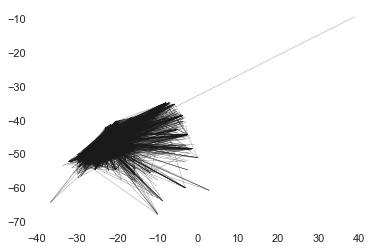

In [43]:
df_full_table.sample(10000).apply(lambda x : connectpoints(x), axis=1)

# CORRELATION Hours to deliever X  Distance

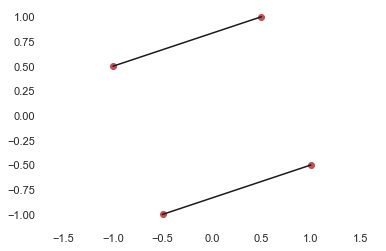

In [44]:
import matplotlib.pyplot as plt

x=[-1 ,0.5 ,1,-0.5]
y=[ 0.5,  1, -0.5, -1]

plt.plot(x,y, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(x,y,0,1)
connectpoints(x,y,2,3)

plt.axis('equal')
plt.show()

In [45]:
NORTE_NORDESTE = ['BA', 'PI', 'PA', 'AL', 'TO', 'RO', 'AP', 'AC', 'RR', 'CE', 'PB']

In [46]:
df_norte_nordeste = df_full_table[df_full_table.customer_state.isin(NORTE_NORDESTE)]

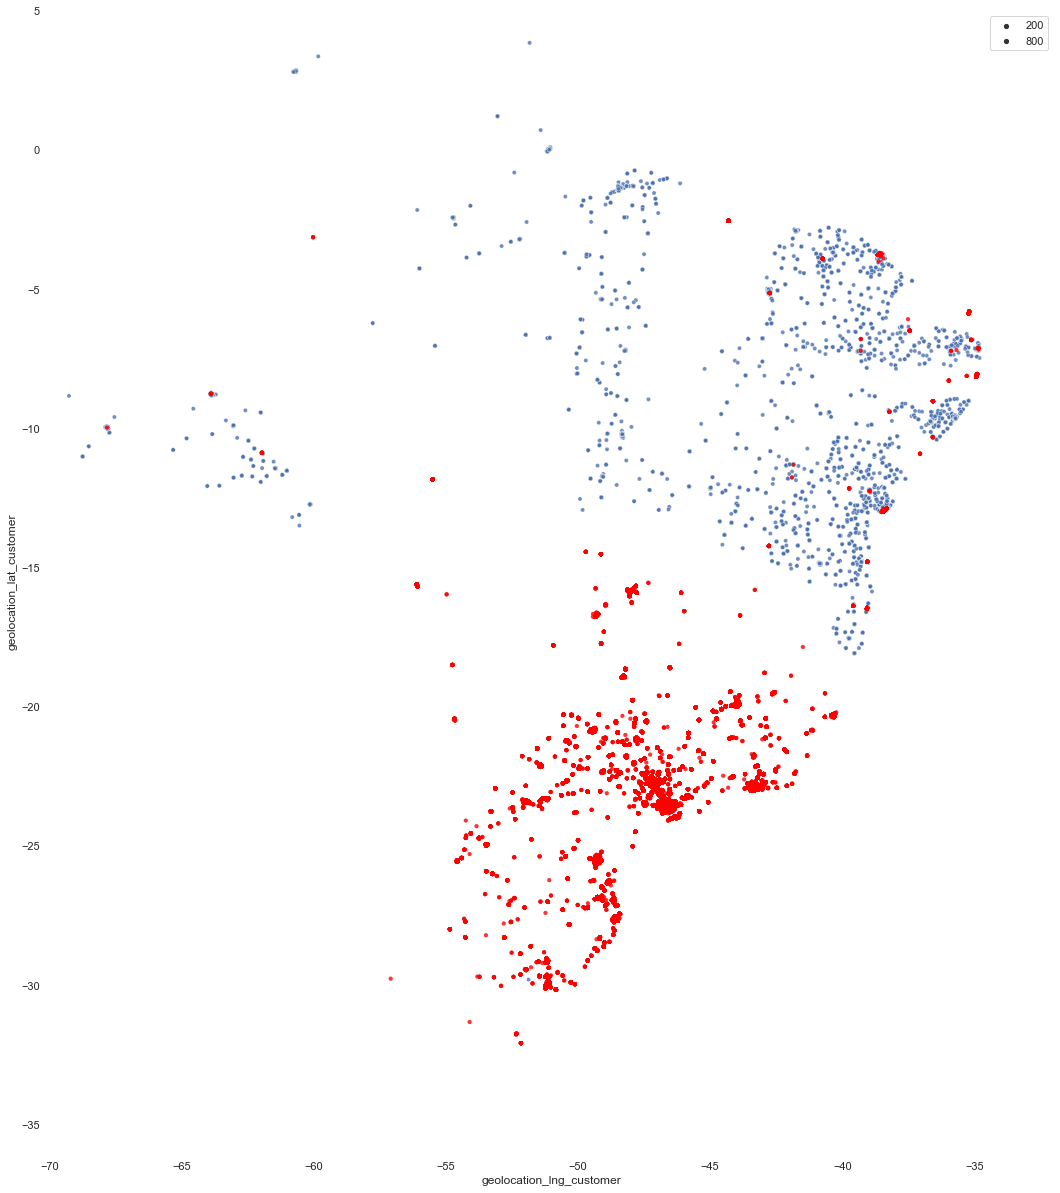

In [47]:
# Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(figsize = (18,21))

sns.scatterplot(data=df_norte_nordeste,
                x='geolocation_lng_customer',
                y='geolocation_lat_customer',
#                 hue='Cluster',
                alpha=0.8,
                size=200,
#                 sizes=(100, 300),
                linewidth=0.4,
                palette='dark')


sns.scatterplot(data=df_full_table,
                x='geolocation_lng_seller',
                y='geolocation_lat_seller',
#                 hue='Cluster',
                alpha=0.8,
                size=800,
                color='red',
#                 sizes=(100, 300),
                linewidth=0.0,
                palette='dark')

ax.set_xlim(-70,-32);
ax.set_ylim(-36,5);

In [84]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans


INIT = 'k-means++'
N_INIT = 10
MAX_ITER = 300

In [94]:
# Forçando cluster para ACRE
# df_full_table[df_full_table.customer_city == "rio branco"]

In [109]:
df_norte_nordeste[df_norte_nordeste['order_id'] == "d445a6e277eaa62900bc18d453d96d76"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,LAT_LONG_seller,Cluster
925,d445a6e277eaa62900bc18d453d96d76,c2cd065252fa7ad04274d9d69dd9c09e,delivered,2017-08-03 10:39:39,2017-08-03 10:50:24,2017-08-07 14:57:56,2017-08-14 20:37:25,2017-09-06,1.0,credit_card,...,71551.0,brasilia,DF,NaN,NaN,NaN,NaN,NaN,NaN,2


In [115]:
df_norte_nordeste['weight'] = df_norte_nordeste.apply(lambda row : 10000 if (row['order_id'] == "d445a6e277eaa62900bc18d453d96d76") else 1, axis=1)

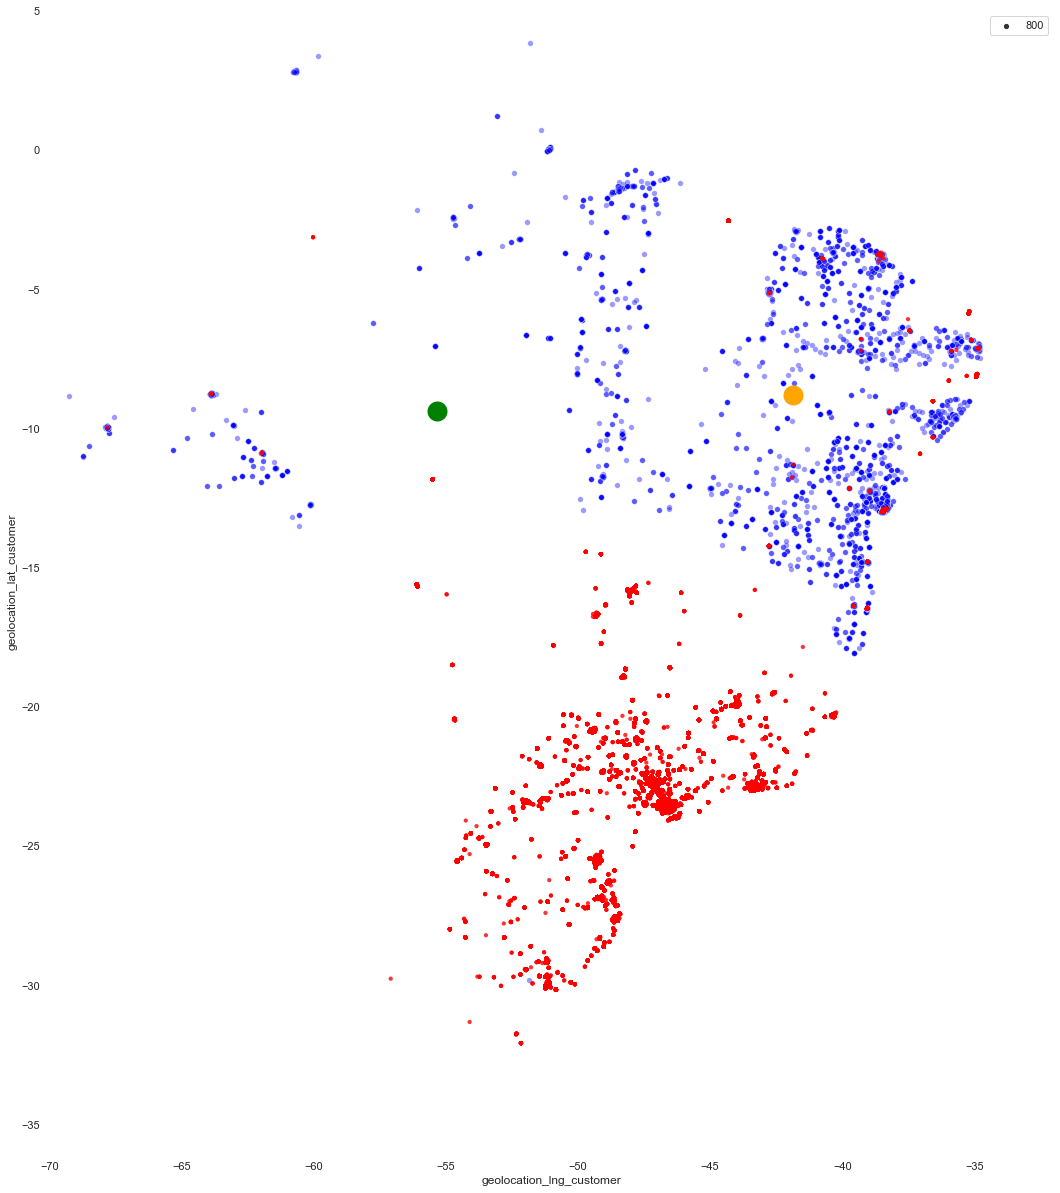

In [116]:
kmeans = KMeans(n_clusters = 1, #numero de clusters
                init = INIT,
                n_init = N_INIT, #algoritmo que define a posição dos clusters de maneira mais assertiva
                max_iter = MAX_ITER)

kmeans_w = KMeans(n_clusters = 1, #numero de clusters
                init = INIT,
                n_init = N_INIT, #algoritmo que define a posição dos clusters de maneira mais assertiva
                max_iter = MAX_ITER)


COLUMNS_TO_CLUSTER = ['geolocation_lng_customer', 'geolocation_lat_customer']

df_norte_nordeste = df_norte_nordeste.dropna(subset=COLUMNS_TO_CLUSTER)

kmeans.fit(df_norte_nordeste[COLUMNS_TO_CLUSTER])
kmeans_w.fit(df_norte_nordeste[COLUMNS_TO_CLUSTER], sample_weight=df_norte_nordeste['weight'])


df_norte_nordeste['Cluster'] = kmeans.predict(df_norte_nordeste[COLUMNS_TO_CLUSTER])
df_norte_nordeste['Cluster_W'] = kmeans_w.predict(df_norte_nordeste[COLUMNS_TO_CLUSTER])

df_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=['lng', 'lat'])
df_clusters_w = pd.DataFrame(kmeans_w.cluster_centers_, columns=['lng', 'lat'])

# Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(figsize = (18,21))

sns.scatterplot(data=df_norte_nordeste,
                x='geolocation_lng_customer',
                y='geolocation_lat_customer',
                alpha=0.4,
                s=30,
                color='blue',
                linewidth=0.4)

sns.scatterplot(data=df_full_table,
                x='geolocation_lng_seller',
                y='geolocation_lat_seller',
                alpha=0.8,
                size=800,
                color='red',
                linewidth=0.0)

sns.scatterplot(data=df_clusters,
                x = 'lng',
                y = 'lat',
                alpha=1.0,
                s=400,
                color='orange',
                linewidth=0.0)

sns.scatterplot(data=df_clusters_w,
                x = 'lng',
                y = 'lat',
                alpha=1.0,
                s=400,
                color='green',
                linewidth=0.0)

plt.style.library['seaborn-bright']
ax.set_xlim(-70,-32);
ax.set_ylim(-36,5);

In [79]:
%%time

dict_resultados = {}
sse = []

for N_CLUSTER in range(1,10):
    kmeans = KMeans(n_clusters = N_CLUSTER, #numero de clusters
                    init = INIT,
                    n_init = N_INIT, #algoritmo que define a posição dos clusters de maneira mais assertiva
                    max_iter = MAX_ITER)
    

    
    
    COLUMNS_TO_CLUSTER = ['geolocation_lng_customer', 'geolocation_lat_customer']

    df_norte_nordeste = df_norte_nordeste.dropna(subset=COLUMNS_TO_CLUSTER)

    kmeans.fit(df_norte_nordeste[COLUMNS_TO_CLUSTER])
    
    # Elbow method
    sse.append(kmeans.inertia_)
    
    df_norte_nordeste['Cluster'] = kmeans.predict(df_norte_nordeste[COLUMNS_TO_CLUSTER])
    
    dict_resultados[N_CLUSTER] = pd.DataFrame(kmeans.cluster_centers_, columns=['lng', 'lat'])

Wall time: 37.8 s


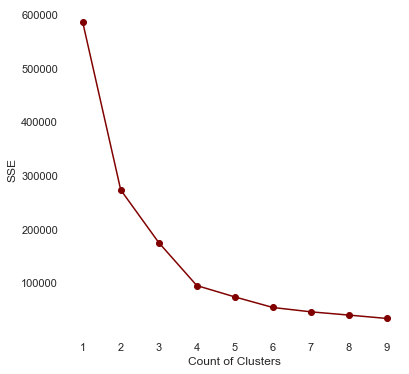

In [81]:
# plot to identify the elbow
plt.figure(figsize=(6, 6))
plt.plot(range(1, 10), sse, '-o', c = 'maroon')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE');

In [51]:
CENTROS_DE_DISTRIBUICAO = pd.DataFrame(kmeans.cluster_centers_, columns=['lng', 'lat'])

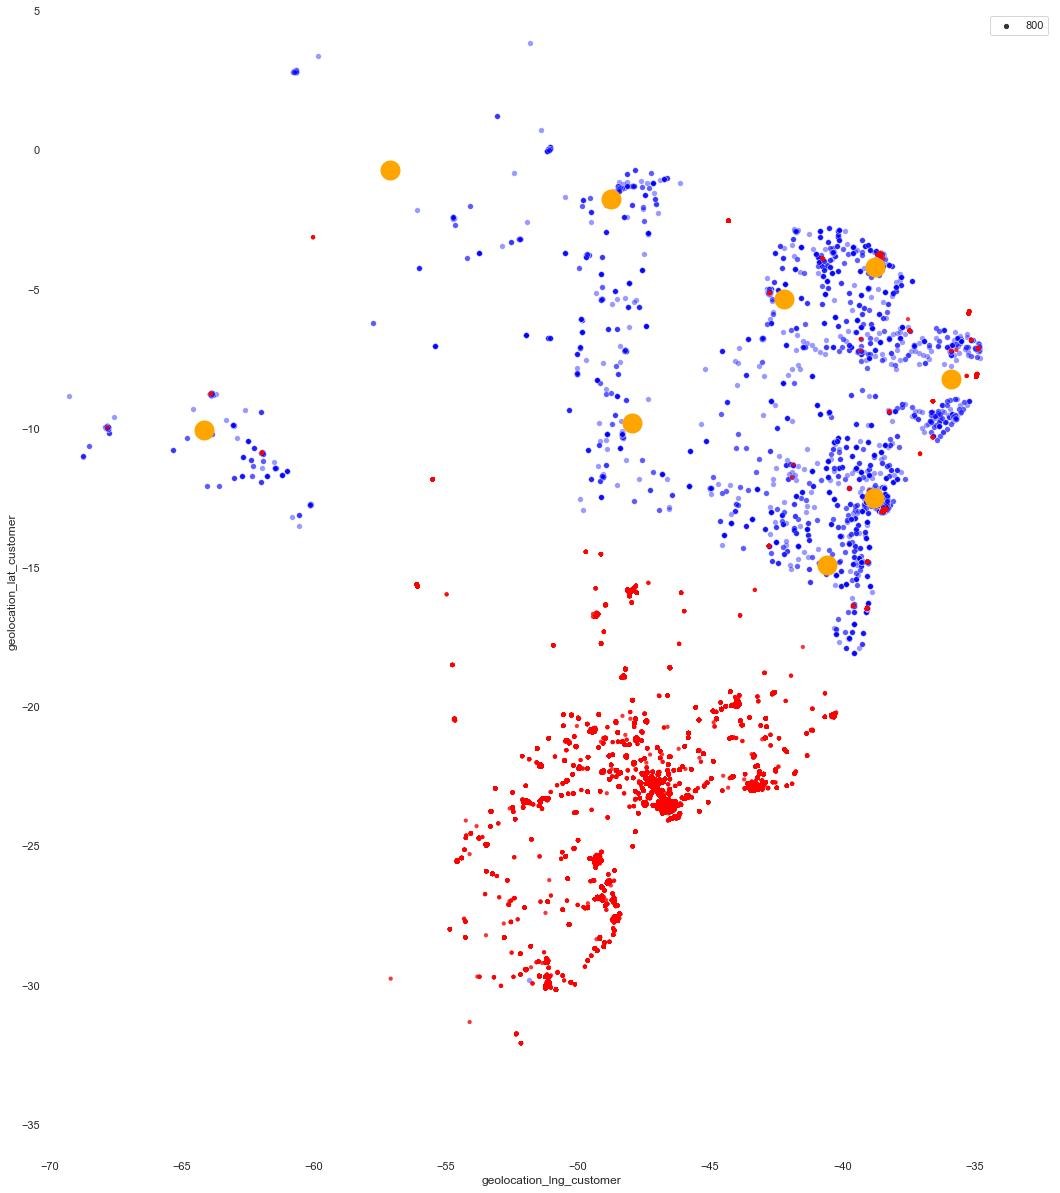

In [83]:
# Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(figsize = (18,21))

sns.scatterplot(data=df_norte_nordeste,
                x='geolocation_lng_customer',
                y='geolocation_lat_customer',
                alpha=0.4,
                s=30,
                color='blue',
                linewidth=0.4)

sns.scatterplot(data=df_full_table,
                x='geolocation_lng_seller',
                y='geolocation_lat_seller',
                alpha=0.8,
                size=800,
                color='red',
                linewidth=0.0)

sns.scatterplot(data=dict_resultados[9],
                x = 'lng',
                y = 'lat',
                alpha=1.0,
                s=400,
                color='orange',
                linewidth=0.0)


plt.style.library['seaborn-bright']
ax.set_xlim(-70,-32);
ax.set_ylim(-36,5);

In [53]:
df_full_table[['order_purchase_timestamp','order_delivered_customer_date', 'order_estimated_delivery_date']]

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
2,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
3,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
4,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
...,...,...,...
119138,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02
119139,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27
119140,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15
119141,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15


In [54]:
df_full_table['tempo_de_entrega'] = df_full_table['order_delivered_customer_date'] - \
                                            df_full_table['order_purchase_timestamp']

In [55]:
df_full_table['tempo_de_atraso'] = df_full_table['order_delivered_customer_date'] - \
                                            df_full_table['order_estimated_delivery_date']

In [56]:
df_full_table['tempo_de_entrega'] = df_full_table['tempo_de_entrega'].dt.days

In [57]:
df_full_table['tempo_de_atraso'] = df_full_table['tempo_de_atraso'].dt.days

In [58]:
df_full_table['ratio'] = df_full_table['tempo_de_atraso'] / df_full_table['tempo_de_entrega']

In [59]:
df_full_table[['tempo_de_atraso','tempo_de_entrega', 'ratio']]

,tempo_de_atraso,tempo_de_entrega,ratio
0,-8.0,8.0,-1.000000
1,-8.0,8.0,-1.000000
2,-8.0,8.0,-1.000000
3,-6.0,13.0,-0.461538
4,-18.0,9.0,-2.000000
...,...,...,...
119138,-2.0,22.0,-0.090909
119139,-6.0,24.0,-0.250000
119140,-21.0,17.0,-1.235294
119141,-21.0,17.0,-1.235294


In [60]:
df_full_table[df_full_table['customer_city'] == 'salvador']['customer_city'].shape[0]

1544

In [61]:
df_full_table[df_full_table['customer_city'] == 'sao paulo']['customer_city'].shape[0]

18875

In [62]:
df_full_table[df_full_table['customer_city'] == 'sao paulo']['tempo_de_entrega'].mean()

7.563247909950276

In [63]:
df_full_table[df_full_table['customer_city'] == 'salvador']['tempo_de_entrega'].mean()

18.74645987862441

In [64]:
df_full_table[df_full_table['customer_city'] == 'salvador']['freight_value'].mean()

25.420169160702763

In [65]:
df_full_table[df_full_table['customer_city'] == 'sao paulo']['freight_value'].mean()

14.377450739574153

In [66]:
c1 = df_full_table['product_category_name'] == 'beleza_saude'
c2 = df_full_table['customer_city'] == 'sao paulo'

a = df_full_table[c1 & c2]['freight_value'].mean()
b = df_full_table[c1 & c2]['tempo_de_entrega'].mean()

print(f"{a} {b}")

12.966991150442421 7.290960451977401


In [67]:
c1 = df_full_table['product_category_name'] == 'beleza_saude'
c2 = df_full_table['customer_city'] == 'salvador'

a = df_full_table[c1 & c2]['freight_value'].mean()
b = df_full_table[c1 & c2]['tempo_de_entrega'].mean()

print(f"{a} {b}")

23.261456953642377 18.41780821917808


In [68]:
df_full_table.groupby('customer_city')['tempo_de_entrega'].mean().sort_values(ascending=True).head(10)

customer_city
iomere                2.000000
contenda              3.000000
acucena               3.000000
siriji                3.000000
bento de abreu        3.333333
pedra bela            3.500000
sao patricio          4.000000
cambara do sul        4.000000
sao joao da urtiga    4.000000
agua doce             4.000000
Name: tempo_de_entrega, dtype: float64

In [78]:
for i in df_full_table.columns:
    print(i)

order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
payment_sequential
payment_type
payment_installments
payment_value
review_id
review_score
review_comment_title
review_comment_message
review_creation_date
review_answer_timestamp
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
geolocation_zip_code_prefix_customer
geolocation_lat_customer
geolocation_lng_customer
geolocation_city_customer
geolocation_state_customer
LAT_LONG
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
seller_zip_code_prefix
seller_city
seller_state
geolocation_zip_code_prefix_seller
geolocation_lat_seller
geolocation_lng_seller
geolocation_city_seller
geolocation_state_seller
LAT_LONG_seller
tempo_